### Human Activity Recognition

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

### Load The Data Sets

In [3]:
# data = pd.read_csv('WISDM_ar_v1.1_raw.txt')

### ParserError: Error tokenizing data. C error: Expected 6 fields in line 134634, saw 11

In [4]:
file = open('WISDM_ar_v1.1_raw.txt')
lines = file.readlines()
processlist =[]
for i,line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0],line[1],line[2],line[3],line[4],last]
        processlist.append(temp)
    except:
        print('Error found in line',i)

    

Error found in line 281873
Error found in line 281874
Error found in line 281875


In [5]:
processlist

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [6]:
columns = ['Id','Activity','Time','X','Y','Z']

In [7]:
data = pd.DataFrame(processlist,columns=columns)

In [8]:
data.head()

,Id,Activity,Time,X,Y,Z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [9]:
data.isnull().sum()

Id          0
Activity    0
Time        0
X           0
Y           0
Z           0
dtype: int64

In [10]:
data.shape

(343416, 6)

In [11]:
data.count()

Id          343416
Activity    343416
Time        343416
X           343416
Y           343416
Z           343416
dtype: int64

In [12]:
data['Activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: Activity, dtype: int64

### we  can see very unbalaced Data so first we have to convert it into balanced data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        343416 non-null  object
 1   Activity  343416 non-null  object
 2   Time      343416 non-null  object
 3   X         343416 non-null  object
 4   Y         343416 non-null  object
 5   Z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [14]:
data['X']

0          -0.6946377
1            5.012288
2            4.903325
3         -0.61291564
4          -1.1849703
             ...     
343411           0.31
343412           2.76
343413            0.8
343414          -1.57
343415          -2.56
Name: X, Length: 343416, dtype: object

In [15]:
data['X'].astype('float')
data['Y'].astype('float')
data['Z'].astype('float')

0         0.503953
1         0.953424
2        -0.081722
3         3.023717
4         7.205164
            ...   
343411    0.040861
343412    0.844462
343413    1.334794
343414    1.416516
343415    1.879608
Name: Z, Length: 343416, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        343416 non-null  object
 1   Activity  343416 non-null  object
 2   Time      343416 non-null  object
 3   X         343416 non-null  object
 4   Y         343416 non-null  object
 5   Z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [17]:
data.head()

,Id,Activity,Time,X,Y,Z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [18]:
df = data.drop(['Id','Time'],axis=1)

In [19]:
df.head()

,Activity,X,Y,Z
0,Jogging,-0.6946377,12.680544,0.50395286
1,Jogging,5.012288,11.264028,0.95342433
2,Jogging,4.903325,10.882658,-0.08172209
3,Jogging,-0.61291564,18.496431,3.0237172
4,Jogging,-1.1849703,12.108489,7.205164


In [20]:
df['Activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: Activity, dtype: int64

In [21]:
Walking= df[df['Activity']=='Walking'].head(3555).copy()     
Jogging= df[df['Activity']=='Jogging'].head(3555).copy()   
Upstairs= df[df['Activity']=='Upstairs'].head(3555).copy()     
Downstairs = df[df['Activity']=='Downstairs'].head(3555).copy()    
Sitting = df[df['Activity']=='Sitting'].head(3555).copy() 
Standing = df[df['Activity']=='Standing'].head(3555).copy()

In [22]:
balaced_data = pd.DataFrame()
balanced_data = balaced_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])

In [23]:
balanced_data.shape

(21330, 4)

### Label Encoder

### To convert String value in to categorical values

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Activity'])


In [26]:
balanced_data.head()

,Activity,X,Y,Z,label
597,Walking,0.84446156,8.008764,2.7921712,5
598,Walking,1.1168685,8.62168,3.7864566,5
599,Walking,-0.50395286,16.657684,1.3075534,5
600,Walking,4.7943625,10.760075,-1.1849703,5
601,Walking,-0.040861044,9.234595,-0.6946377,5


In [27]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

### X,Y,Z is not having in same variance so we have to `Standardization`

In [28]:
X = balanced_data[['X','Y','Z']]
y = balanced_data['label']

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_dataframe = pd.DataFrame(X,columns=['x','y','z'])
scaled_dataframe['label'] = y.values


In [30]:
scaled_dataframe

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


### Frame Preparation

In [31]:
import scipy.stats as stats

In [32]:
fs = 20
frame_size = fs*4 #80
hope_size = fs*2 #40

In [33]:
def get_frame(df,frame_size,hope_size):
    
    N_features = 3
    
    frames = []
    labels = []
    
    for i in range(0, len(df)-frame_size, hope_size):
        x = df['x'].values[i : i+frame_size]
        y = df['y'].values[i : i+frame_size]
        z = df['z'].values[i : i+frame_size]
        
        #retrive the the most often used label in this segment
        label = stats.mode(df['label'][i : i+frame_size])[0][0]
        frames.append([x,y,z])
        labels.append(label)
        
    #Bring segment in to better shape
    frames = np.asarray(frames).reshape(-1,frame_size,N_features)
    labels = np.asarray(labels)
    
    return frames,labels

In [34]:
X,y = get_frame(scaled_dataframe,frame_size,hope_size)

In [35]:
X.shape,y.shape

((532, 80, 3), (532,))

In [36]:
(3555*6)/40

533.25

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

In [38]:
X_train.shape,X_test.shape

((425, 80, 3), (107, 80, 3))

In [39]:
# Two dimensional data
X_train[0].shape

(80, 3)

In [40]:
# but our cnn model three dimensional data sp first we reshape this data
X_train = X_train.reshape(425, 80, 3,1)
X_test = X_test.reshape(107, 80, 3,1)

In [41]:
X_train[0].shape

(80, 3, 1)

### Build 2d CNN

In [42]:
model = Sequential()

model.add(Conv2D(16,(2,2),activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 2, 16)         80        
_________________________________________________________________
dropout (Dropout)            (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 78, 1, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2496)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                159808    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [44]:
model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_test,y_test))

Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/sample - loss: 1.6622 - accuracy: 0.2588 - val_loss: 1.4018 - val_accuracy: 0.5327
Epoch 2/10
425/425 [==============================] - 0s 268us/sample - loss: 1.2542 - accuracy: 0.5153 - val_loss: 0.9894 - val_accuracy: 0.8505
Epoch 3/10
425/425 [==============================] - 0s 352us/sample - loss: 0.9325 - accuracy: 0.7012 - val_loss: 0.6005 - val_accuracy: 0.8692
Epoch 4/10
425/425 [==============================] - 0s 300us/sample - loss: 0.6603 - accuracy: 0.7647 - val_loss: 0.4136 - val_accuracy: 0.8972
Epoch 5/10
425/425 [==============================] - 0s 387us/sample - loss: 0.6012 - accuracy: 0.7718 - val_loss: 0.3424 - val_accuracy: 0.8785
Epoch 6/10
425/425 [==============================] - 0s 249us/sample - loss: 0.4685 - accuracy: 0.8306 - val_loss: 0.3034 - val_accuracy: 0.8972
Epoch 7/10
425/425 [==============================] - 0s 265us/sample - loss: 0.

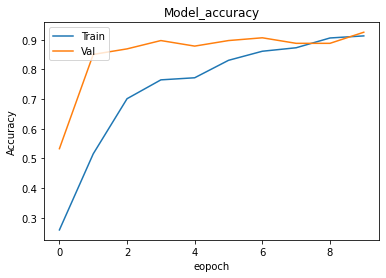

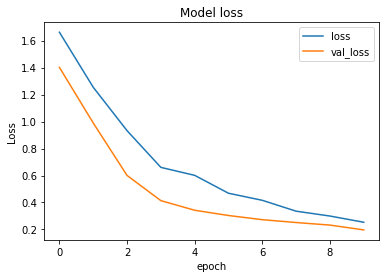

In [46]:
# ploting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('eopoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# ploting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'],loc='upper right')

In [48]:
!pip install mlxtend

In [49]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [50]:
# reset the matplotlib config 
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [51]:
y_pred = model.predict_classes(X_test)

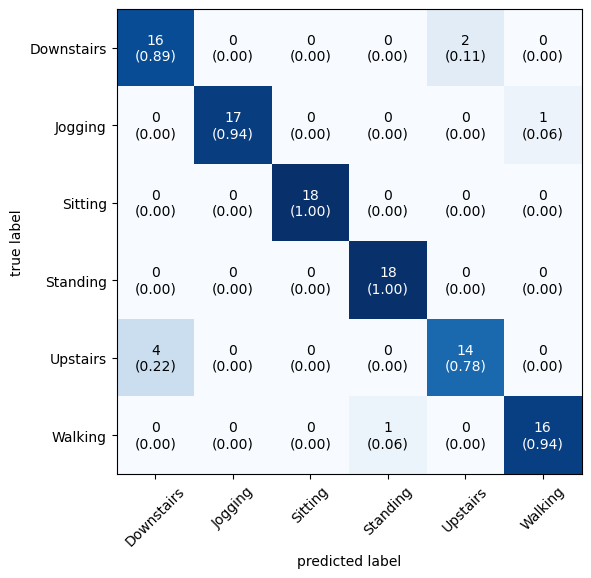

In [52]:
mat = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=mat,figsize=(6,6),class_names=label.classes_,show_normed=True)
plt.tight_layout()
fig.savefig('cm.png')

### Observation
- Here we accuracy of 92% if we use only accelerometer sensor data 
- To increase accuracy we can collect more sensors data
- there is little bit misconception to understand difference between Downstair and Upstair activity
- Learning Curve express that after 6 epoch training accuracy is greater than validation accuracy.This means Overlaping is Occurring